In [1]:
import pandas as pd
from pathlib import Path
import csv
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [6]:
file = Path("../Data/final_1688.csv")

movie_clean_df = pd.read_csv(file)

movie_clean_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations
0,Inception,825532764,160000000,665532764,Action,148.0,2010.0,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74.0,87%,159.0,220.0
1,Interstellar,701729206,165000000,536729206,Adventure,169.0,2014.0,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74.0,73%,0.0,0.0
2,The Dark Knight,1004558444,185000000,819558444,Action,152.0,2008.0,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84.0,94%,163.0,164.0
3,Avatar,2923706026,237000000,2686706026,Action,162.0,2009.0,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83.0,82%,91.0,131.0
4,The Avengers,1518815515,220000000,1298815515,Action,143.0,2012.0,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69.0,91%,39.0,81.0


In [7]:
movie_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1688 non-null   object 
 1   revenue            1688 non-null   int64  
 2   budget             1688 non-null   int64  
 3   profit             1688 non-null   int64  
 4   main_genre         1688 non-null   object 
 5   Runtime(Mins)      1688 non-null   float64
 6   Year               1688 non-null   float64
 7   original_language  1688 non-null   object 
 8   Director_O         1684 non-null   object 
 9   Actors_O           1688 non-null   object 
 10  Rating             1688 non-null   float64
 11  Metascore_O        1672 non-null   float64
 12  Rotten_Tomato_O    1678 non-null   object 
 13  Award Wins         1688 non-null   float64
 14  Award Nominations  1688 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 197.9+ KB


In [2]:
genre_file = Path("../Data/starting_7351.csv")

genre_df = pd.read_csv(genre_file)

genre_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,Rating
0,Inception,825532764,160000000,665532764,Action,148.0,2010.0,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0,87%,159.0,220.0,8.8
1,Interstellar,701729206,165000000,536729206,Adventure,169.0,2014.0,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",74.0,73%,0.0,0.0,8.6
2,The Dark Knight,1004558444,185000000,819558444,Action,152.0,2008.0,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0,94%,163.0,164.0,9.0
3,Avatar,2923706026,237000000,2686706026,Action,162.0,2009.0,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",83.0,82%,91.0,131.0,7.8
4,The Avengers,1518815515,220000000,1298815515,Action,143.0,2012.0,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",69.0,91%,39.0,81.0,8.0


In [4]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              7351 non-null   object 
 1   revenue            7351 non-null   int64  
 2   budget             7351 non-null   int64  
 3   profit             7351 non-null   int64  
 4   main_genre         3796 non-null   object 
 5   Runtime(Mins)      3796 non-null   float64
 6   Year               3796 non-null   float64
 7   original_language  7351 non-null   object 
 8   Director_O         1900 non-null   object 
 9   Actors_O           1910 non-null   object 
 10  Metascore_O        1877 non-null   float64
 11  Rotten_Tomato_O    1888 non-null   object 
 12  Award Wins         3796 non-null   float64
 13  Award Nominations  3796 non-null   float64
 14  Rating             3796 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 861.6+ KB


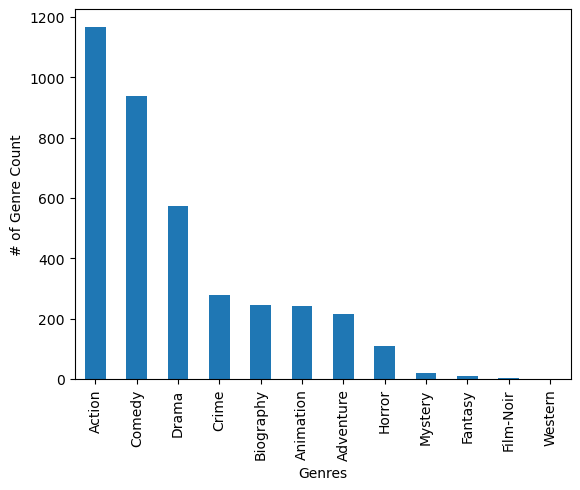

In [3]:
#genre counts using original df
genre_count = genre_df['main_genre'].value_counts()
genre_count.plot(kind = 'bar', xlabel = 'Genres', ylabel= '# of Genre Count')
plt.show()

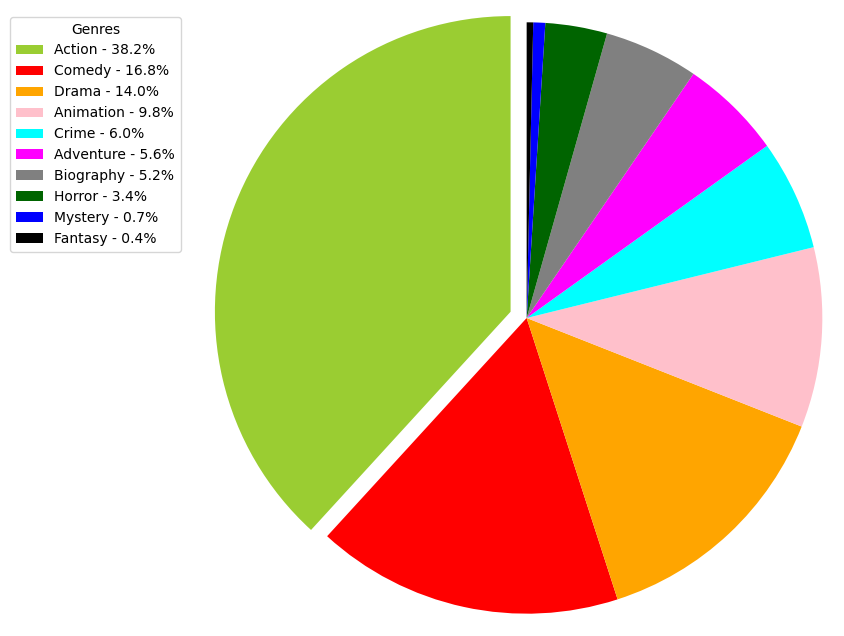

In [8]:
#Pie Chart of Genre Movie Counts using cleaned df
explode = (0.07,0,0,0,0,0,0,0,0,0)
labels = ['Action', 'Comedy', 'Drama', 'Animation', 'Crime', 'Adventure', 'Biography', 'Horror', 'Mystery', 'Fantasy']
colors = ['yellowgreen','red', 'orange','pink', 'cyan','magenta','grey', 'darkgreen', 'blue','black']


genre_count = movie_clean_df['main_genre'].value_counts()

fig1, ax1 = plt.subplots(figsize=(15, 8))
wedges, texts = plt.pie(genre_count, colors=colors, explode=explode, startangle=90, radius=1.2)
plt.legend(wedges, [f'{label} - {count/sum(genre_count)*100:.1f}%' for label, count in zip(labels, genre_count)], title="Genres", loc="upper left",bbox_to_anchor = (-.35,1))
plt.show()

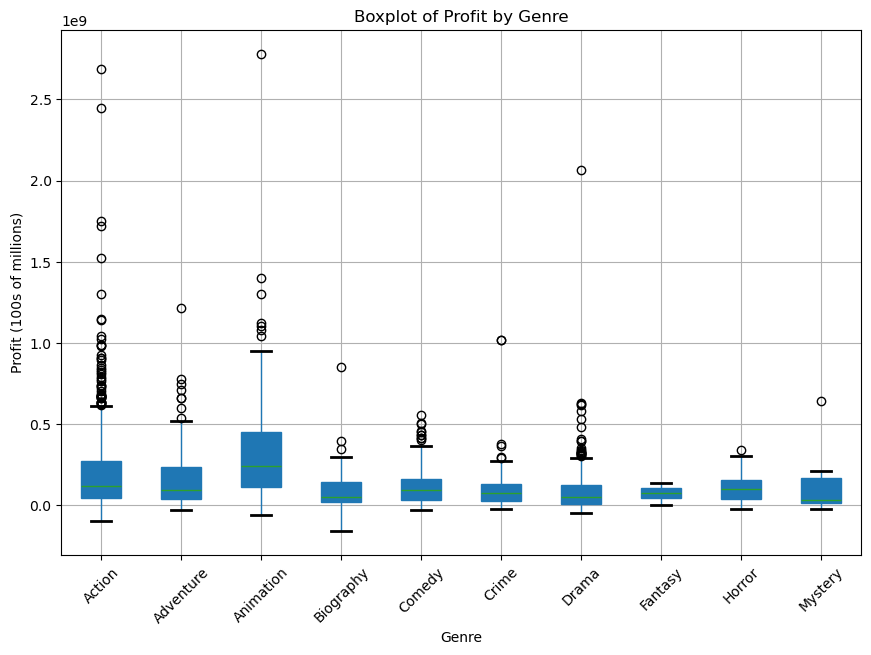

In [26]:
plot = movie_clean_df.boxplot(by='main_genre', column='profit', figsize=(10, 7), patch_artist = True, capprops = dict(color = "black", linewidth = 2), vert = True, showfliers = True)
plt.title('')
plt.suptitle('')
plot.set_title('')
plt.xlabel('Genre')
plt.ylabel('Profit (100s of millions)')
plt.title('Boxplot of Profit by Genre')
#ax = plot.add_axes([0, 0, 1, 1])

plt.xticks(rotation=45)
#plt.grid(False)
plot = plt.show()

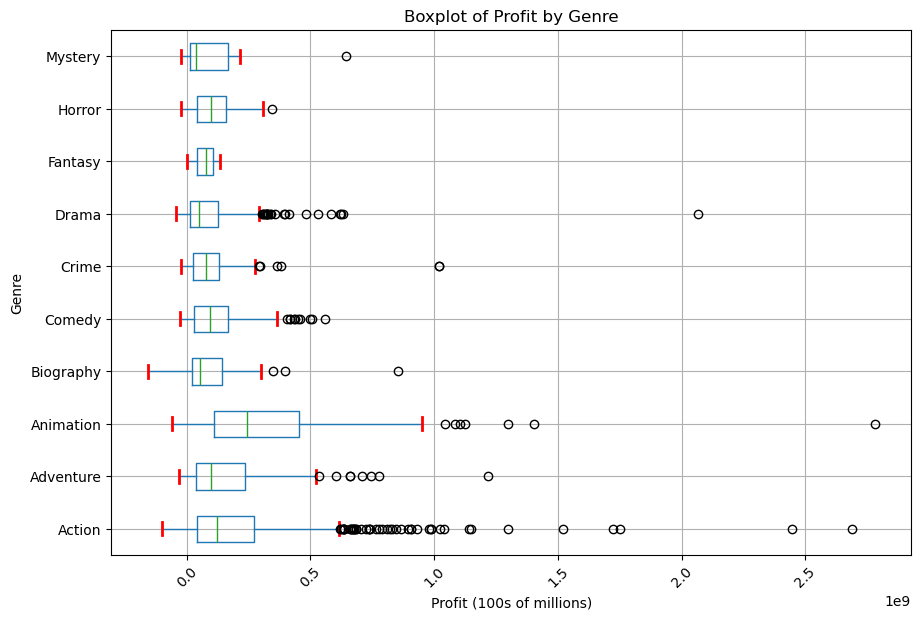

In [19]:
plot = movie_clean_df.boxplot(by='main_genre', column='profit', figsize=(10, 7), capprops = dict(color = "red", linewidth = 2), vert = False)
plt.title('')
plt.suptitle('')
plot.set_title('')
plt.ylabel('Genre')
plt.xlabel('Profit (100s of millions)')
plt.title('Boxplot of Profit by Genre')
#ax = plot.add_axes([0, 0, 1, 1])

plt.xticks(rotation=45)
#plt.grid(False)
plot = plt.show()

Text(0, 0.5, 'Budget')

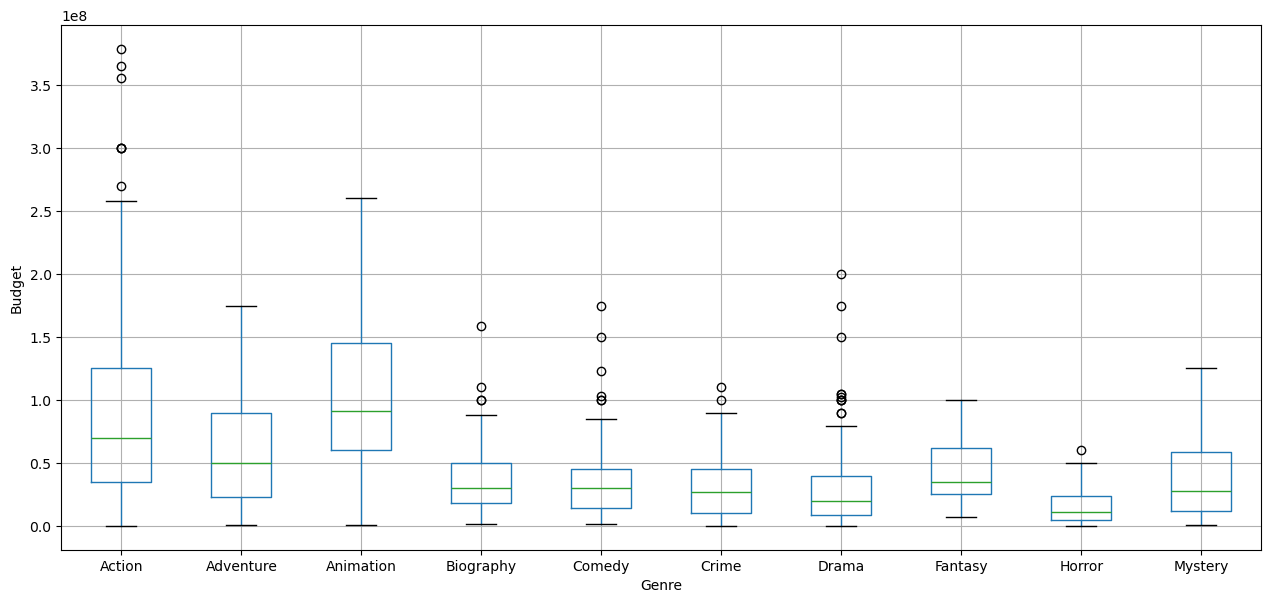

In [10]:
plot = movie_clean_df.boxplot(by='main_genre', column='budget', figsize=(15, 7))
plt.title('')
plt.suptitle('')
plot.set_title('')
plt.xlabel('Genre')
plt.ylabel('Budget')

Text(0, 0.5, 'Rating (IMDB)')

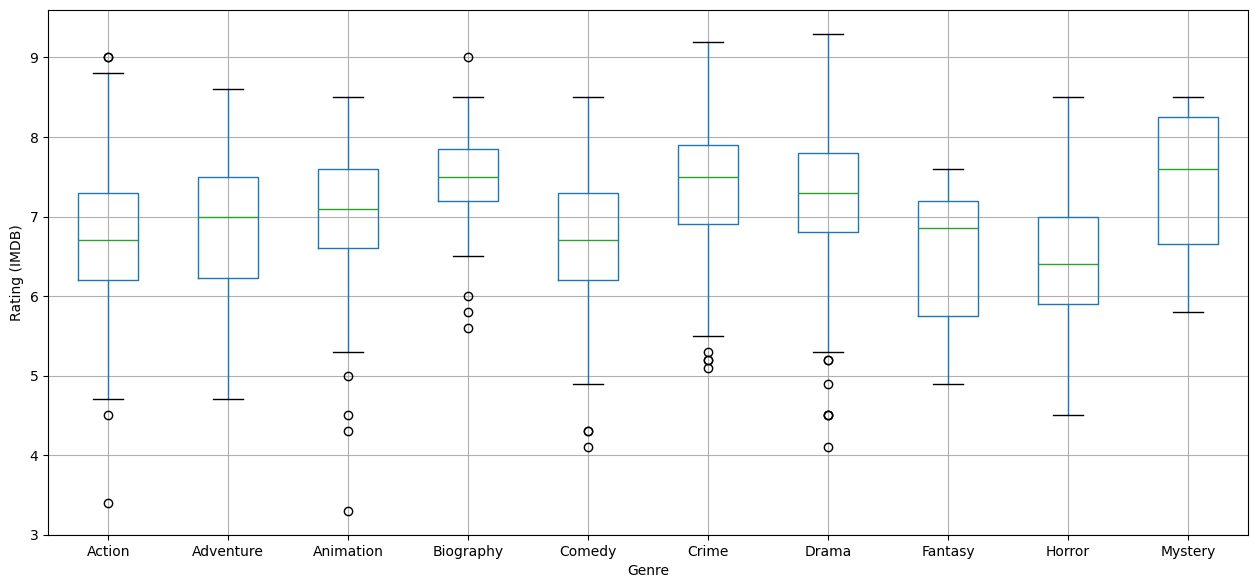

In [11]:
plot = movie_clean_df.boxplot(by='main_genre', column='Rating', figsize=(15, 7))
plt.title('')
plt.suptitle('')
plot.set_title('')
plt.xlabel('Genre')
plt.ylabel('Rating (IMDB)')